In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import cvxpy as cp
from numpy import linalg as LA
import pprint
from lap import lapjv
import copy
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
import datetime
from tqdm import tqdm_notebook


ro = np.linspace(0,1,40)
alpha = 0.4
n = 30
# number of iteration for the same ro
k = 10






In [3]:
# Generate A
def A_adj(alpha,n):
    A=np.identity(n)
    P=np.ones([n,n]) 
    #print(P)
    A= P-A
    for i in range(n):
        for j in range(i+1,n):
            A[i][j] =random.uniform(0,1)
            if A[i][j] < alpha:
                A[i][j] = 1
            else:
                A[i][j] = 0
            A[j][i] = A[i][j]
    return A

# Generate B
def B_adj(ro,alpha,A):
    B = np.zeros([len(A),len(A)])
    for i in range(len(B)):
        for j in range(i+1,len(B)):
            B[i][j] =random.uniform(0,1)
            if B[i][j] < (1-ro)*alpha + ro*A[i][j]:
                B[i][j] = 1
            else:
                B[i][j] = 0
            B[j][i] = B[i][j]
    return B
    

                
            
                
            

In [4]:
#Construct a n-degree permutation matrix 

def permu(N):
    E=np.identity(N)
    permutation = np.random.permutation(N)
    P=np.zeros([N,N]) #initialize the permutation matrix
     
    for i in range(0,N):
        P[i]=E[permutation[i]]
    
    
    return P.astype(int)

In [5]:
def ret_permu_result(l,n):
    ret = np.zeros((n, n))
    for i in range(n):
        ret[i][l[i]] = 1
    #print(ret)
    return ret

In [8]:


def A_B_convex_relaxation_LAP(ro,alpha,n,k):
    sum_align = 0
    for i in range(k):
        P_1 = np.identity(n)
        A = A_adj(alpha,n)
        B_ori = B_adj(ro,alpha,A)
        B = np.matmul(P_1, np.matmul(B_ori,P_1.T))
        

        # Define and solve the CVXPY problem.
        P = cp.Variable((n,n))
        arr = cp.expressions.constants.Constant([[1 for i in range(n)]])
        constraints = [P.__matmul__(arr) == arr, P.T.__matmul__(arr) == arr, cp.min(P)>=0]
        prob = cp.Problem(cp.Minimize((cp.norm(P.__matmul__(A)-(P.T.__matmul__(B.T)).T, 'fro'))**2), constraints)
        # prob = cp.Problem(cp.Minimize(LA.norm(np.multiply(P,A)-np.matmul(B,P), 'fro')), constraints)
        prob.solve()

        #Print result for step 1
        #print("Loss is", prob.value)
        #print("The optimal P is")
        P_step_1 = copy.deepcopy(P.value)
        for i in range(len(P_step_1)):
            for j in range(len(P_step_1)):
                P_step_1[i][j] = round(P_step_1[i][j],2)

        #print(P_step_1)

        # LAP
        P_dsm = P.value
        x,y,c = lapjv(-P_dsm)
        index_list = y
        #print(index_list)
        P_r = ret_permu_result(index_list,n)
        
        align_percent = (np.trace(P_1.T @ P_r))/n
        #print(align_percent)
        sum_align += align_percent
        #print(sum_align)
    
    avg_align = sum_align / k
    #print(avg_align)
    return avg_align
    
        


In [9]:
starttime = datetime.datetime.now()

aligned_percent_list = []
for i in tqdm_notebook(range(len(ro))):
    
    r = A_B_convex_relaxation_LAP(ro[i],alpha,n,k)
    print(r)
    aligned_percent_list.append(r)



<ipython-input-9-d944d2d55d13>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(ro))):


0.026666666666666665
0.023333333333333334
0.019999999999999997
0.03
0.03666666666666667
0.03
0.03
0.039999999999999994
0.04666666666666666
0.026666666666666665
0.03666666666666667
0.03
0.05333333333333333
0.039999999999999994
0.07333333333333333
0.06333333333333332
0.05333333333333333
0.06666666666666667
0.05
0.039999999999999994
0.07999999999999999
0.10666666666666666
0.09333333333333334
0.06666666666666667
0.13666666666666666
0.12666666666666665
0.10999999999999999
0.22666666666666666
0.22666666666666666
0.3266666666666667
0.5799999999999998
0.44333333333333325
0.65
0.7866666666666666
0.8699999999999999
0.9366666666666668
1.0
1.0
1.0
1.0



In [10]:
endtime = datetime.datetime.now()
print (endtime - starttime)

0:32:55.290279


In [11]:
print(aligned_percent_list)

[0.026666666666666665, 0.023333333333333334, 0.019999999999999997, 0.03, 0.03666666666666667, 0.03, 0.03, 0.039999999999999994, 0.04666666666666666, 0.026666666666666665, 0.03666666666666667, 0.03, 0.05333333333333333, 0.039999999999999994, 0.07333333333333333, 0.06333333333333332, 0.05333333333333333, 0.06666666666666667, 0.05, 0.039999999999999994, 0.07999999999999999, 0.10666666666666666, 0.09333333333333334, 0.06666666666666667, 0.13666666666666666, 0.12666666666666665, 0.10999999999999999, 0.22666666666666666, 0.22666666666666666, 0.3266666666666667, 0.5799999999999998, 0.44333333333333325, 0.65, 0.7866666666666666, 0.8699999999999999, 0.9366666666666668, 1.0, 1.0, 1.0, 1.0]


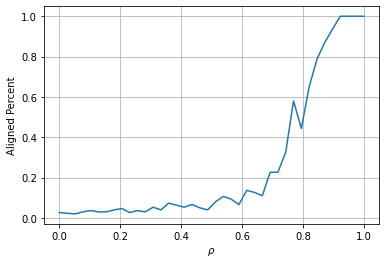

In [12]:

plt.plot(ro, aligned_percent_list)
plt.xlabel(r'$\rho$')
plt.ylabel('Aligned Percent')
plt.grid()
plt.savefig('Aligned Percent.eps', dpi=500)